In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# ***Veri Setinin İncelenmesi***

Bu veri setimizin konusu adından da anlaşılacağı üzere "Youtube Video İstatistikleri". Veri paketinde *Kanada, Büyük Britanya, Meksika, Kore, Birleşik Devletler, Hindistan, Almanya, Rusya* ve *Japonya* olmak üzere 9 ülkeden veriler içermekte. Ben bu notebook'ta sadece Birleşik Devletler'in verileri ile ilgileneceğim. Şimdi veri setimizi tanıyarak başlayalım

In [4]:
#Veri setinin import edilmesi
df = pd.read_csv('USvideos.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Veri setimiz çeşitli parametrelerden oluşan 16 sütunu içeriyor. Bu 15 çeşit verinin hiçbir sütununda *null* bir veri yer almazken sadece *description* sütununda *null* değerler var. Veri setimiz *integer* değerlerin yanında *non-integer* değerler de içeriyor. Sütunların veri içeriklerine daha yakından bakmak istersek eğer işte veri setimizin ilk 5 ve son 5 satırlarındaki değerler. 

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Keşifsel Veri Analizi (EDA)

	•	İzlenme sayısının yorum, beğeni ve beğenmemeyle olan ilişkisini görselleştireceğiz.

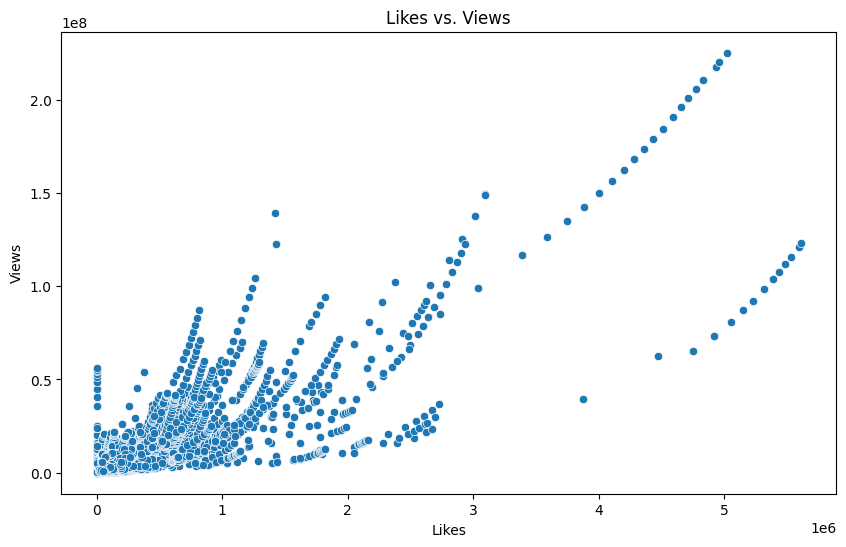

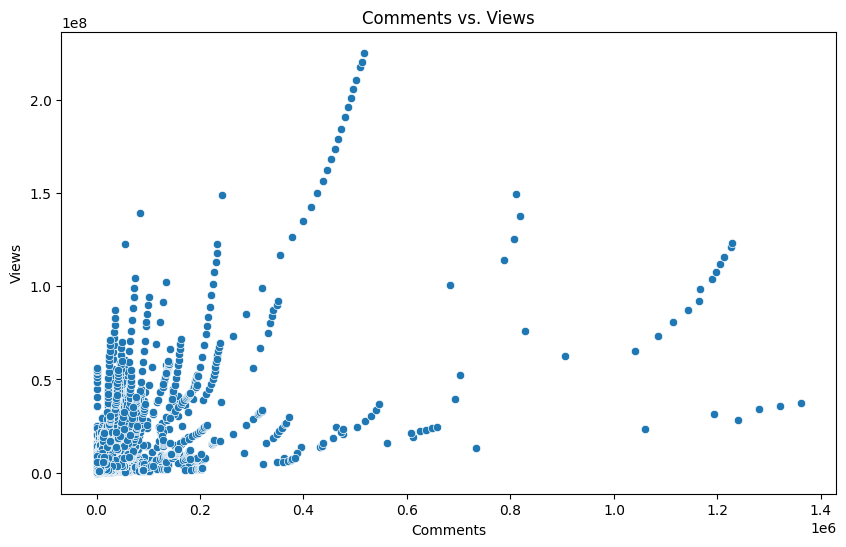

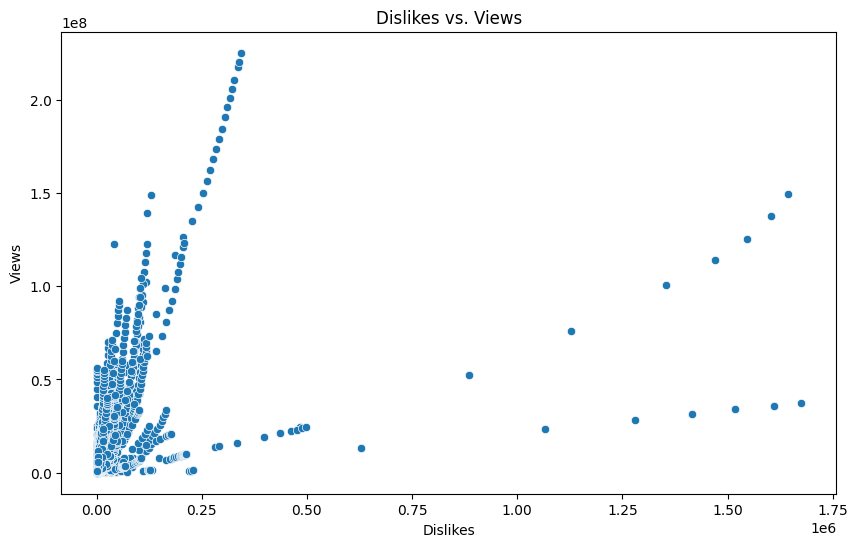

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# İzlenme sayısı ile beğeni sayısı
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='views', data=df)
plt.title('Likes vs. Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

# İzlenme sayısı ile yorum sayısı
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_count', y='views', data=df)
plt.title('Comments vs. Views')
plt.xlabel('Comments')
plt.ylabel('Views')
plt.show()

# İzlenme sayısı ile beğenmeme sayısı
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dislikes', y='views', data=df)
plt.title('Dislikes vs. Views')
plt.xlabel('Dislikes')
plt.ylabel('Views')
plt.show()

Görüldüğü üzere comment *count*, *like* ve *dislike* gibi parametrelerin artışı her daim bir izlenme artışına işaret olmayabiliyor. 

	•	Her kategori için ortalama izlenme sayısını gösteren bir grafik oluşturacağım.

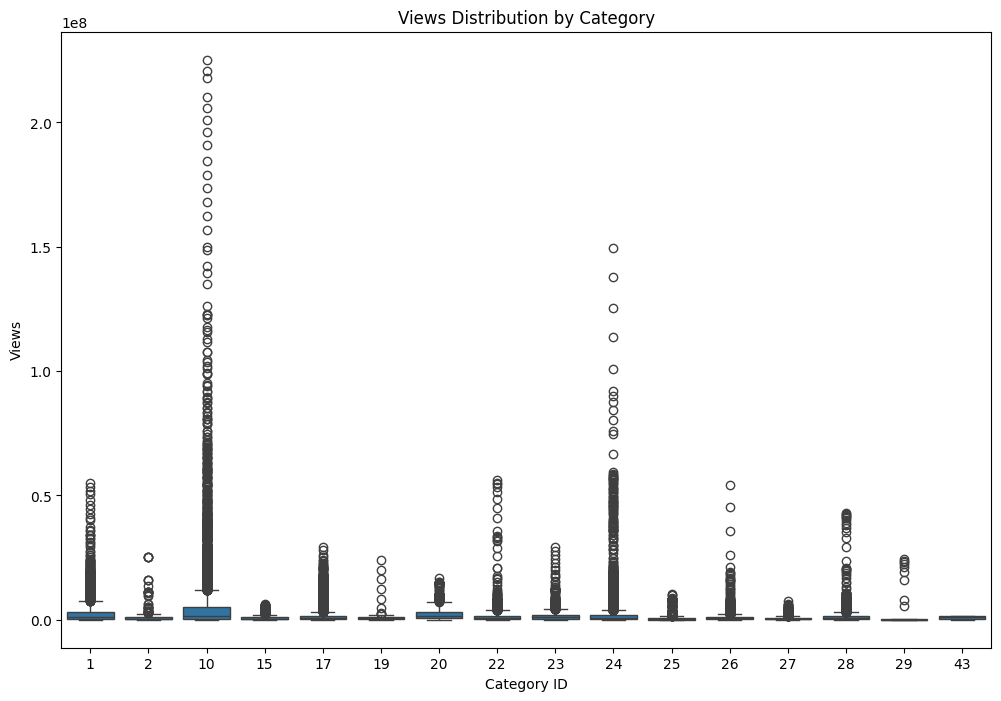

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_id', y='views', data=df)
plt.title('Views Distribution by Category')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.show()

Yukarıdaki grafikten de anlaşılacağı üzere en çok izlenene içerikler *Category ID 10*'dan çıkmakta. 10'u *Category ID 24* takip ediyor.

Korelasyon Analizi:

	• 	İzlenme sayısı, beğeni, beğenme, yorum sayısı ve kategori ID’si arasındaki korelasyonu inceleyeceğim.

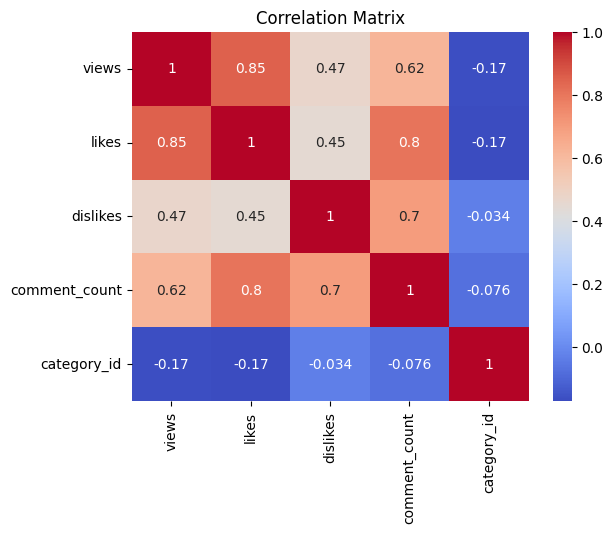

In [11]:
correlation_matrix = df[['views', 'likes', 'dislikes', 'comment_count', 'category_id']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Veri Dağılımını İnceleme:

	•	İzlenme, beğeni, beğenme ve yorum sayılarının dağılımını inceleyeceğim.

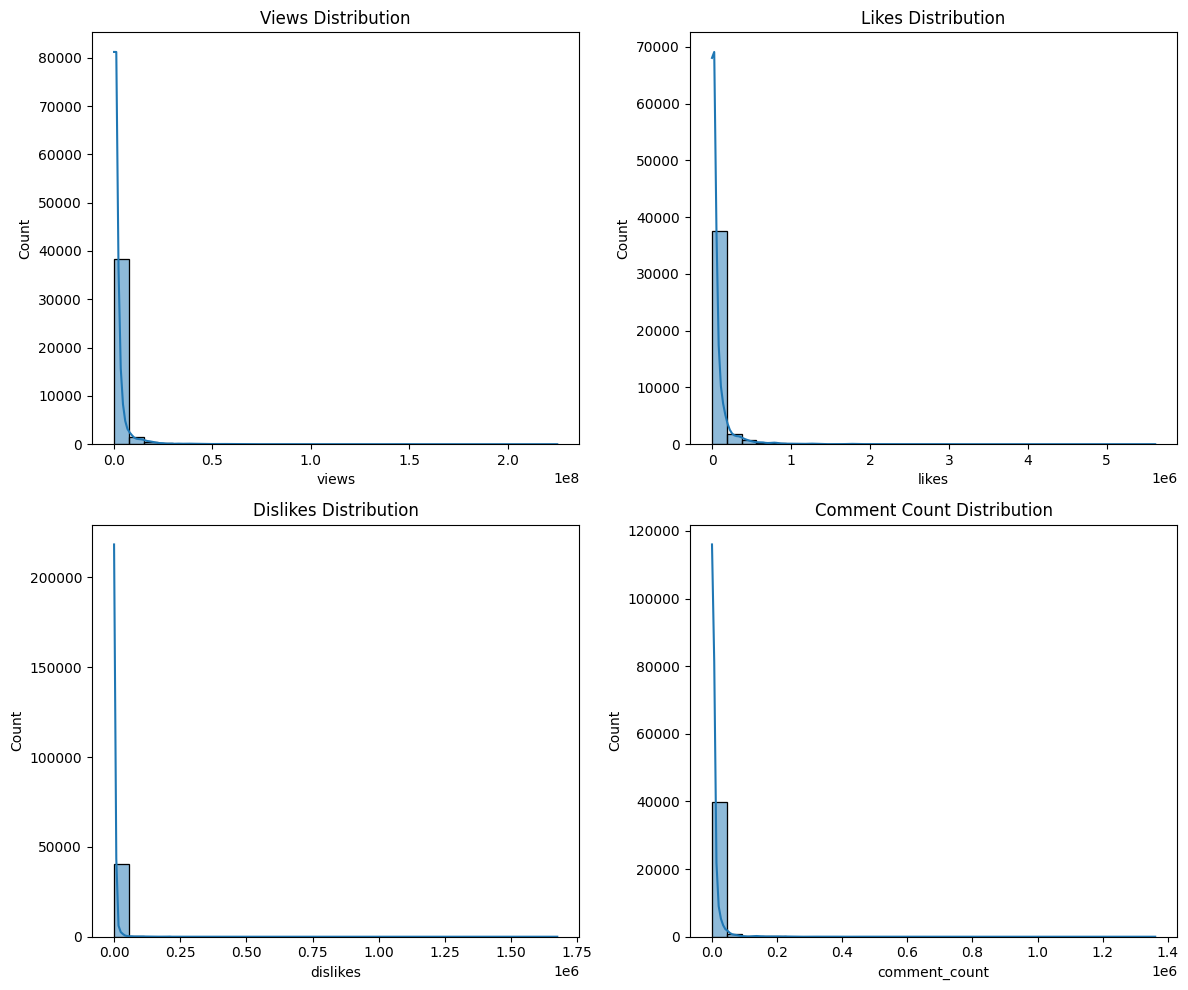

In [12]:
plt.figure(figsize=(12, 10))

# İzlenme Sayısı Dağılımı
plt.subplot(2, 2, 1)
sns.histplot(df['views'], bins=30, kde=True)
plt.title('Views Distribution')

# Beğeni Sayısı Dağılımı
plt.subplot(2, 2, 2)
sns.histplot(df['likes'], bins=30, kde=True)
plt.title('Likes Distribution')

# Beğenmemek Sayısı Dağılımı
plt.subplot(2, 2, 3)
sns.histplot(df['dislikes'], bins=30, kde=True)
plt.title('Dislikes Distribution')

# Yorum Sayısı Dağılımı
plt.subplot(2, 2, 4)
sns.histplot(df['comment_count'], bins=30, kde=True)
plt.title('Comment Count Distribution')

plt.tight_layout()
plt.show()

# ***Data Preprocessing***

Benim bu notebook'taki amacım bir videonun kategorisi, beğeni sayısı, beğenmeme sayısı ve yorum sayısından izlenme sayısını tahmin etmeye çalışmak. Bu sebeple bahsettiğim *feature*'lar haricindekilerin hesaplamalarımızın dışında bırakılması adına elimizden çıkartacağım. Ek olarak bunu sağlarken verimizi bağımlı ve bağımsız değişkenler olarak iki gruba ayıracağım. Bu ayırmayı kategori, beğeni sayısı, beğenmeme sayısı ve yorum sayısından yola çıkarak izlenme sayısını hesaplayacağımız için izlenme sayısını bağımlı(y) geri kalan dört *feature*'ın ise bağımsız(X) olmasını sağlayarak yapacağım. 

In [13]:
X = df[['category_id' , 'likes' , 'dislikes' , 'comment_count' ]].values
y = df['views'].values

Yukarıdaki kod sayesinde bağımsız değişkenlerimizi X numpy array'ine ve bağımlı değişkenimizi y numpy array'ine atıyoruz. Dilerseniz tekrar verilerimize göz atalım.

In [14]:
X

array([[    22,  57527,   2966,  15954],
       [    24,  97185,   6146,  12703],
       [    23, 146033,   5339,   8181],
       ...,
       [    24,  48068,   1032,   3992],
       [     1, 192957,   2846,  13088],
       [    20, 357079, 212976, 144795]])

In [15]:
y

array([  748374,  2418783,  3191434, ...,  1066451,  5660813, 10306119])

Şimdi sırada değişkenlerimizi *train* ve *test* set olarak ikiye ayıracağım. Bu sayede belli oranlarda rastgele seçilen veriler ile modelimiz *feature*'lar arasında bağlantı kurmaya çalışacak. Bu ayırma işlemini *sklearn* kütüphanesinden *train_test_split* methodu ile yapacağım.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X array'imize baktığımızda *feature*'larımız arasında büyük sayısal farklılıklar gözlemliyoruz. Bu sorun modelimizi eğitirken büyük sayılardan oluşan *feature*'ımızı daha önemli bir etken olarak ele almasına ve dolayısıyla tahminlerimizin başarısız olmasına sebebiyet verebilir. Bu sebeple *Feature Scaling* uygulayacağım. Bunu uygulayabilmek için de *sklearn* kütüphanesinden *StandartScaler* methodunu *import* edeceğim. 

In [17]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [18]:
X_train

array([[-1.31600198, -0.03492087, -0.07393861, -0.05143165],
       [-1.31600198,  2.27545248,  1.25883245,  0.77017779],
       [-1.31600198, -0.32126341, -0.12706882, -0.22373472],
       ...,
       [ 1.05883312,  0.14749286, -0.09935763,  0.27678597],
       [-1.31600198, -0.16546261, -0.10842364, -0.15875936],
       [-2.37148425, -0.31342824, -0.12330557, -0.21923642]])

In [19]:
X_test

array([[-1.31600198, -0.22737032, -0.11632646, -0.14642193],
       [ 0.26722142, -0.27843431, -0.01458194, -0.16770334],
       [ 0.53109199, -0.17700261, -0.07195435, -0.16530951],
       ...,
       [-2.50341954, -0.26520091, -0.10702097, -0.19629775],
       [ 0.39915671, -0.03315871, -0.04068519, -0.09220565],
       [-0.392455  , -0.30856296, -0.10206033, -0.18866907]])

Yukarıda da gözüktüğü gibi verilerimiz -3 ve 3 aralığında önceki değerlerine bağlı kalınarak tekrar değerlendirildi. Bu sayede herhangi bir *feature*'ın değerinin büyüklüğü yüzünden daha ağır basmasına engel olduk. 

Evet, *Data Preprocessing* işlemlerimizi tamamlamış bulunuyoruz. Şimdi sırada çeşitli *Regression* yöntemleri ile sırasıyla modelimizi eğitip hangi yöntemin bizim veri setimiz için daha uygun olduğunu bulmaya çalışacağız. Bu veri setinde *Classification* yöntemleri kullanmama sebebimiz verilerimizin sınıflandırılabilir olmaması.

# Model Seçimi için Kütüphaneleri *Import* Etme

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score


In [21]:
regressors = {
              "Linear Regression": LinearRegression(),
              "Ridge Regression": Ridge(),
              "Lasso Regression": Lasso(),
              "Elastic Net Regression": ElasticNet(),
              "Random Forest Regression": RandomForestRegressor(),
              "Gradien Boosting Regression": GradientBoostingRegressor(),
              "Bayesian Regression": BayesianRidge(),
              "SVR": SVR(),
              "Decision Tree Regression": DecisionTreeRegressor(),
              "KNN Regression": KNeighborsRegressor(),
              "XGBRegressor": XGBRegressor()
              }

# Cross Validation ile Optimum Modeli bulmak

In [48]:
for name, regressor in regressors.items():

    regressor.fit(X_train, y_train)

    # test setleri üzerinde tahminler yaptır
    y_test_p = regressor.predict(X_test)

    # test setleri için R-kare puanlarını hesaplar
    # r kare asağıda daha detaylı anlatılmıştır
    test_r2 = r2_score(y_test, y_test_p)

    print(f"Model: {name.upper()}")
    print(f"Test R-Squared Score: {test_r2:.5f}\n")

    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)  
                                                                  
    scores = pd.DataFrame(scores, index = range(1,11))

    print(scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format))

    print("\n############################################################################\n")


Model: LINEAR REGRESSION
Test R-Squared Score: 0.79142

LINEAR REGRESSION
test_r2                                                 0.77417
test_neg_mean_absolute_error                      1206859.84819
test_neg_mean_squared_error                12350994461641.33984
test_neg_mean_absolute_percentage_error                 2.81748
dtype: object

############################################################################

Model: RIDGE REGRESSION
Test R-Squared Score: 0.79141

RIDGE REGRESSION
test_r2                                                 0.77417
test_neg_mean_absolute_error                      1206831.07827
test_neg_mean_squared_error                12350958895633.15039
test_neg_mean_absolute_percentage_error                 2.81881
dtype: object

############################################################################

Model: LASSO REGRESSION
Test R-Squared Score: 0.79142

LASSO REGRESSION
test_r2                                                 0.77417
test_neg_mean_absolu

Görüldüğü üzere en başarılı modelimiz *%94.92* ile *Random Forest Regression* oldu. Bu sebeple hiperparametre optimizasyonuna bu model ile devam edeceğiz.

# Hiperparametre Optimizasyonu

In [22]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

randomForestRegression = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = randomForestRegression, param_distributions = params, n_iter = 100, cv = 5, scoring = 'neg_mean_absolute_error', random_state = 42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters: ", random_search.best_params_)
print("Best score (negative MSE): ", random_search.best_score_)


Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
Best score (negative MSE):  -434194.56719159865


In [23]:
y_pred = random_search.predict(X_test)

In [24]:
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.9477566936362538


# Model Değerlendirme

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# en iyi parametrelerle eğitilmiş modeli kullanarak test verisini tahmin etme
y_pred = random_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# MSE ve MAE nedir?

MSE (Mean Squared Error) ve MAE (Mean Absolute Error), regresyon modellerini değerlendirirken kullanılan iki yaygın hata metriğidir. Her ikisi de modelin tahmin ettiği değerlerle gerçek değerler arasındaki farkı ölçer, ancak farkı ölçme yöntemleri farklıdır.

### 1. **MSE (Mean Squared Error) - Ortalama Kare Hatası**
MSE, tahmin edilen değerler ile gerçek değerler arasındaki hataların karesinin ortalamasını alır. Karesi alındığı için hatalar pozitif hale gelir ve büyük hatalar daha fazla cezalandırılır. Bu nedenle, MSE büyük hatalara karşı daha hassastır.

#### Özellikler:
- **Avantaj:** Büyük hataları daha fazla cezalandırdığı için modelin büyük sapmaları fark etmesine yardımcı olur.
- **Dezavantaj:** Hataların karesini aldığı için birim kare cinsinden sonuç verir. Bu da yorumlamayı zorlaştırabilir.

### 2. **MAE (Mean Absolute Error) - Ortalama Mutlak Hata**
MAE, tahmin edilen değerler ile gerçek değerler arasındaki mutlak hataların ortalamasını alır. Mutlak hata alındığı için her hata pozitif hale gelir, ancak hataların büyüklüğüne göre cezalandırma yapılmaz.


#### Özellikler:
- **Avantaj:** Hataları orijinal birimlerde verdiği için yorumlamak daha kolaydır.
- **Dezavantaj:** MSE kadar büyük hatalara duyarlı değildir; yani modelde büyük sapmalar olsa bile ceza düşük kalabilir.

### Özetle:
- **MSE**: Hataları kareleyerek büyük hatalara daha fazla önem verir, büyük hatalara daha duyarlıdır.
- **MAE**: Hataların mutlak değerini alarak ortalama sapmayı ölçer, büyük ve küçük hataları eşit şekilde ele alır.

Bu iki metrik, regresyon modellerinin performansını anlamak için kullanılır ve hangi metriği kullanmanız gerektiği, modelin hangi tür hatalara karşı duyarlı olmasını istediğinize bağlıdır.

In [26]:
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE):  2735064168075.802
Mean Absolute Error (MAE):  426676.3677179239


Hedef değişkenimiz izlenme sayıları olduğundan ve de bu değerler binler milyonlar ile ifade edildiğinden MSE ve MAE değerlerimizin bu kadar büyük çıkması normal çünkü :
* MSE, hataların karesini aldığı için daha büyük sayılara karşı oldukça duyarlıdır ve hataları büyütür.
* MAE, hataların mutlak değerini aldığı için MSE kadar aşırı büyük olmasa da yine de hedef değişkenin büyüklüğüne bağlı olarak yüksek olabilir.